# Spotify en el mundo, o **un mapa vale más que mil palabras.**

## Justificación.

Ante la posiblidad de tener información o mejor dicho, de tener respuestas respecto al tipo de música que escuchamos y como se clasifican aquellas canciones en una playlist gracias al API de Spotify, es natural extender el alcance de estas respuestas y plantearnos preguntas acerca del mundo en el que coexistimos.

*   ¿Las regiones reflejaran un mejor de vida en la felicidad que consumen a través de canciones?
*   ¿Nos seguirá gustando bailar incluso en épocas donde asistir a un antro es considerado terror biólogico? Y si es así, ¿A quiénes nos gusta bailar más?

Tal vez algo más pesimista, pero que igual es un tema latente al hablar de globalización y sociedades hiperconectadas,
*   ¿Llegó ya el punto en que perdimos nuestra identidad connacional gracias a la extrema cercanía que el mundo actual nos brinda? ¿Hemos llegado al punto donde parecemos cortados del mismo molde?

Si bien estas preguntas (y otras más que estoy seguro están mejor planteadas y tienen mejor sustento) junto con la cantidad de datos a nuestra disposición, gracias a la transparencia de Spotify, pintan para poder hacer un documental entero, es importante aclarar que este análisis no profundizará en estos temas por el momento. Pero sirvámonos de ellos para hacer de toda la parte técnica más amena.



## Instalación de librerías.

Instalemos las librerías que necesitamos al inicio, para no tener problemas despues.

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install spotipy --upgrade

     |████████████████████████████████| 1.0MB 8.3MB/s 
     |████████████████████████████████| 14.8MB 274kB/s 
     |████████████████████████████████| 6.5MB 44.0MB/s 
     |████████████████████████████████| 225kB 8.2MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=e3a3cb41ad28a0581a36b48f0f7d36ab76b6cd8a940eba37f31e1b3c5fd5fa49
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)


Como usaremos el API de Spotify, tras un estudio inicial vemos que necesitamos el ISO code 31666 alpha-2 de los países para poder solicitar la información que necesitamos. Una tarea tal vez bastante repetititva si se hace a mano, pero haciendo scrapping la vida es más sencilla.

In [ ]:
from bs4 import BeautifulSoup
import requests
from re import sub

Importamos la librería y solicitamos la página a scrappear.

In [ ]:
wiki_page = 'https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2'
r = requests.get(wiki_page)
r.status_code

200

In [ ]:
soup = BeautifulSoup(r.text, 'lxml')

Tras inspeccionar la página, nos damos cuenta de que necesitamos los elementos de tipo "td" con clase "active table-active"

In [ ]:
active_iso3166 = soup.find_all('td', class_= 'active table-active')

Echémos un vistazo a lo que recolectamos.

In [ ]:
active_iso3166

[<td class="active table-active" style="background: #9F9; color: black; vertical-align: middle; text-align: center;" title="Andorra"><a href="#AD"><link href="mw-data:TemplateStyles:r886049734" rel="mw-deduplicated-inline-style"/><span class="monospaced">AD</span></a>
 </td>,
 <td class="active table-active" style="background: #9F9; color: black; vertical-align: middle; text-align: center;" title="United Arab Emirates"><a href="#AE"><link href="mw-data:TemplateStyles:r886049734" rel="mw-deduplicated-inline-style"/><span class="monospaced">AE</span></a>
 </td>,
 <td class="active table-active" style="background: #9F9; color: black; vertical-align: middle; text-align: center;" title="Afghanistan"><a href="#AF"><link href="mw-data:TemplateStyles:r886049734" rel="mw-deduplicated-inline-style"/><span class="monospaced">AF</span></a>
 </td>,
 <td class="active table-active" style="background: #9F9; color: black; vertical-align: middle; text-align: center;" title="Antigua and Barbuda"><a href

Y finalmente guardemos los valores ISO que buscabamos, limpiandolos, ya que vimos que todos contenían un carácter innecesario.

In [ ]:
from re import sub

In [ ]:
list_countries = []
list_isos = []
for element in active_iso3166:
  list_countries.append(element.get('title'))
  iso  = element.contents[0].get('href')
  try:
    iso_clean = sub('#', '', iso)
  except Exception as e:
    print(e)
  list_isos.append(iso_clean)

expected string or bytes-like object


Hagamos un sanity check de la información, ya que tuvimos un error al ir creando nuestra lista.

In [ ]:
print(len(list_countries))
print(len(list_isos))

243
243


Vemos que no tenemos valores "None" (o no faltan valores) en la lista de ISOS

In [ ]:
None in list_isos

False

In [ ]:
list_isos[-1]

'ZW'

In [ ]:
print(list_isos)

['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BL', 'BM', 'BN', 'BO', 'BR', 'BS', 'BT', 'BV', 'BW', 'BY', 'BZ', 'CA', 'CC', 'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FK', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD', 'GF', 'GG', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GS', 'GT', 'GU', 'GW', 'GY', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IO', 'IQ', 'IR', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'MF', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NA', 'NC', 'NE', 'NF', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NU', 'NZ', 'OM

In [ ]:
print(list_countries)

['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Åland Islands', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Saint Barthélemy', 'Bermuda', 'Brunei Darussalam', 'Bolivia (Plurinational State of)', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos (Keeling) Islands', 'Congo, Democratic Republic of the', 'Central African Republic', 'Congo', 'Switzerland', "Côte d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Curaçao', 'Christmas Island', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji', 'Falkland Islands (Malvina

Sin embargo si los tenemos en la lista de países. Nos damos cuenta que es el mismo elemento el que esta teniendo problemas, que es el último que scrappeamos. Por lo tanto, lo tiramos.

In [ ]:
list_isos.pop(); list_countries.pop()

In [ ]:
print(len(list_countries))
print(len(list_isos))

242
242


Creamos un diciconario con los valores, para poder acceder más rapidamente a la información.

In [ ]:
dict_countries_iso = dict( zip(list_isos, list_countries))

In [ ]:
dict_countries_iso

{'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua and Barbuda',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AX': 'Åland Islands',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BL': 'Saint Barthélemy',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia (Plurinational State of)',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos (Keeling) Islands',
 'CD': 'Congo, Democratic Republic of the',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland',
 'CI': "Côte d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',


Al estar investigando sobre códigos ISO, nos damos cuenta que hay algunas variaciones incluso para el 3166, y encontramos una página que tiene las dos versiones. La scrappeamos igualmente porque podría ser de utilidad despues.

In [ ]:
webpath ='https://www.iban.com/country-codes'

In [ ]:
r = requests.get(webpath)
r.status_code

200

In [ ]:
soup = BeautifulSoup(r.text, 'lxml')

In [ ]:
active_isos = soup.find_all('tr')

Creamos nuestras listas de información, teniendo en cuenta que como ahora lidiamos con una tabla con header, la primera fila tendrá el nombre de las columnas.

In [ ]:
import pandas as pd

In [ ]:
column_names = []
headers = active_isos[0].find_all('th')
for header in headers:
  column_names.append(header.get_text())

table_data = []
for i in range(1, len(active_isos)):
  values_row = []
  columns = active_isos[i].find_all('td')
  for column in columns:
    values_row.append(column.get_text())
  table_data.append(values_row)

In [ ]:
print(column_names); print(table_data)

['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric']
[['Afghanistan', 'AF', 'AFG', '004'], ['Åland Islands', 'AX', 'ALA', '248'], ['Albania', 'AL', 'ALB', '008'], ['Algeria', 'DZ', 'DZA', '012'], ['American Samoa', 'AS', 'ASM', '016'], ['Andorra', 'AD', 'AND', '020'], ['Angola', 'AO', 'AGO', '024'], ['Anguilla', 'AI', 'AIA', '660'], ['Antarctica', 'AQ', 'ATA', '010'], ['Antigua and Barbuda', 'AG', 'ATG', '028'], ['Argentina', 'AR', 'ARG', '032'], ['Armenia', 'AM', 'ARM', '051'], ['Aruba', 'AW', 'ABW', '533'], ['Australia', 'AU', 'AUS', '036'], ['Austria', 'AT', 'AUT', '040'], ['Azerbaijan', 'AZ', 'AZE', '031'], ['Bahamas (the)', 'BS', 'BHS', '044'], ['Bahrain', 'BH', 'BHR', '048'], ['Bangladesh', 'BD', 'BGD', '050'], ['Barbados', 'BB', 'BRB', '052'], ['Belarus', 'BY', 'BLR', '112'], ['Belgium', 'BE', 'BEL', '056'], ['Belize', 'BZ', 'BLZ', '084'], ['Benin', 'BJ', 'BEN', '204'], ['Bermuda', 'BM', 'BMU', '060'], ['Bhutan', 'BT', 'BTN', '064'], ['Bolivia (Plurinational State of)', 'BO', 

In [ ]:
iso_full = pd.DataFrame(data = table_data, columns = column_names)

Finalmente vemos el DataFrame que obtuvimos.

In [ ]:
iso_full

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,004
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,008
3,Algeria,DZ,DZA,012
4,American Samoa,AS,ASM,016
...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876
245,Western Sahara,EH,ESH,732
246,Yemen,YE,YEM,887
247,Zambia,ZM,ZMB,894


Ahora, veamos la librería que tanto se ha mencionado, y con la cual simplificaremos bastante toda la interacción que tendremos con el API de Spotify.

## Spotipy.

### Entendiendo Spotipy y viendo ejemplos de uso.

Empezamos por importar la librería e ingresando nuestro _id_ y _secreto_ . Tras leer la documentación, Spotify solo necesita estos datos personales para solicitar información a nivel usuario, sin embargo ingresaremos para eliminar algunos límites de requests.  

(Agrega los tuyos al correrlo)

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'pon tu cid aqui'
secret = 'pon tu secret aqui'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


El ejemplo que viene en la documentación de Spotipy. Importante ya que nos deja empezar a imaginar como va a estar estructurado nuestro próximo código.

In [ ]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


Ahora, Spotipy cuenta con todos los métodos para endpoints que el API de Spotify maneja. Por lo tanto basta con leer la documentación para saber que hace cada endpoint y cuales datos necesitamos.

In [ ]:
playlist_cat_mex = sp.categories(country = 'MX')


In [ ]:
playlist_cat_mex

{'categories': {'href': 'https://api.spotify.com/v1/browse/categories?country=MX&offset=0&limit=20',
  'items': [{'href': 'https://api.spotify.com/v1/browse/categories/toplists',
    'icons': [{'height': 275,
      'url': 'https://t.scdn.co/media/derived/toplists_11160599e6a04ac5d6f2757f5511778f_0_0_275_275.jpg',
      'width': 275}],
    'id': 'toplists',
    'name': 'Top Lists'},
   {'href': 'https://api.spotify.com/v1/browse/categories/equal',
    'icons': [{'height': None,
      'url': 'https://t.scdn.co/images/6c6f4045c93f4a78b60abe1ad02f6d7c',
      'width': None}],
    'id': 'equal',
    'name': 'EQUAL'},
   {'href': 'https://api.spotify.com/v1/browse/categories/regional_mexican',
    'icons': [{'height': None,
      'url': 'https://t.scdn.co/images/c765fa1ce6994fce8796d2d0d93c1e61.jpeg',
      'width': None}],
    'id': 'regional_mexican',
    'name': 'Regional Mexican'},
   {'href': 'https://api.spotify.com/v1/browse/categories/music_of_mexico',
    'icons': [{'height': None,


Solicitamos las categorías ya que nos interesan los top hits de cada país, veamos podemos encontrar algo parecido en México.

In [ ]:
categories_list_mx = []
for category in playlist_cat_mex['categories']['items']:
  category_id = category['id']
  categories_list_mx.append(category_id)
  print(category_id)

toplists
equal
regional_mexican
music_of_mexico
pop
wellness
latin
romance
sleep
workout
decades
focus
chill
party
salsa
hiphop
rock
indie_alt
alternative
edm_dance


Ahora que tenemos la categoría que buscabamos, procedamos a ver como obtener las playlists que necesitamos y como viene estructurada la información.

In [ ]:
toplists_mexico = sp.category_playlists(category_id= 'toplists', country='MX', limit= 2)

In [ ]:
mexico_tracks_features = sp.audio_features('5Km4r87BoX2qqtoprYS1gh')

In [ ]:
dict_features = mexico_tracks_features[0]

In [ ]:
dict_features

{'acousticness': 0.0433,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5Km4r87BoX2qqtoprYS1gh',
 'danceability': 0.772,
 'duration_ms': 265240,
 'energy': 0.758,
 'id': '5Km4r87BoX2qqtoprYS1gh',
 'instrumentalness': 0,
 'key': 9,
 'liveness': 0.295,
 'loudness': -3.891,
 'mode': 1,
 'speechiness': 0.0482,
 'tempo': 115.977,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/5Km4r87BoX2qqtoprYS1gh',
 'type': 'audio_features',
 'uri': 'spotify:track:5Km4r87BoX2qqtoprYS1gh',
 'valence': 0.654}

In [ ]:
mexico_tracks_toplists = sp.playlist_tracks(playlist_id= '37i9dQZF1DX5BAPG29mHS8', market = 'MX')

In [ ]:
mexico_tracks_toplists.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [ ]:
mexico_tracks_toplists['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [ ]:
mexico_tracks_toplists['items'][0]

{'added_at': '2021-03-11T18:01:00Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/790FomKkXshlbRYZFtlgla'},
     'href': 'https://api.spotify.com/v1/artists/790FomKkXshlbRYZFtlgla',
     'id': '790FomKkXshlbRYZFtlgla',
     'name': 'KAROL G',
     'type': 'artist',
     'uri': 'spotify:artist:790FomKkXshlbRYZFtlgla'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/2R21vXR83lH98kGeO99Y66'},
     'href': 'https://api.spotify.com/v1/artists/2R21vXR83lH98kGeO99Y66',
     'id': '2R21vXR83lH98kGeO99Y66',
     'name': 'Anuel AA',
     'type': 'artist',
     'uri': 'spotify:artist:2R21vXR83lH98kGeO99Y66'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/1vy

In [ ]:
toplists_mexico['playlists']['items'][0]

{'collaborative': False,
 'description': 'Los hits de ahora en la playlist más grande de México. En portada: KAROL G',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX5BAPG29mHS8'},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5BAPG29mHS8',
 'id': '37i9dQZF1DX5BAPG29mHS8',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f000000034230691c02aa5c1a1de09978',
   'width': None}],
 'name': 'Éxitos México',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': None,
 'snapshot_id': 'MTYxNTQ4NTY2MCwwMDAwMDE2OTAwMDAwMTc4MjI3MmViYmMwMDAwMDE3N2ZlNmY1MDE1',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5BAPG29mHS8/tracks',
  'total': 50},
 'type': 'playlist',
 'uri': 'spotify:playlist:37i9dQZF1DX5BA

Ahora que conocemos la estructura de los requests que haremos, es tiempo de escalar este proceso para todo el mundo (o al menos donde Spotify pueda cobrar mensualidad)

### Creación del dataset, parte 1.

Pidámosle a Spotipy las toplists de los códigos que scrappeamos. Es muy probable que no todos los países tengan Spotify, por lo tanto buscamos _handlear_ la excepción.

In [ ]:
dict_iso_toplists = {}
for isocode in dict_countries_iso:
  try:
    country_toplists = sp.category_playlists(category_id= 'toplists', country= isocode, limit = 2)
    dict_iso_toplists[isocode] = country_toplists['playlists']['items']
  except Exception as e:
    print(e)

HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=AF&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=AO&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=AQ&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=AS&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=AW&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=AX&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=BJ&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=BL&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=BM&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=BV&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CC&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CD&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CF&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CG&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CI&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CK&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CN&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CU&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=CX&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=DJ&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=EH&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=ER&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=ET&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=FK&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=FO&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GF&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GG&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GI&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GL&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GP&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GS&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=GU&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=HM&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=IM&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=IO&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=IQ&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=IR&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=JE&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=KP&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=KY&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=LY&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MF&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MG&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MM&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MP&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MQ&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MS&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MU&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=MZ&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=NC&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=NF&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=NU&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=PF&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=PM&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=PN&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=PR&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=RE&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SD&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SH&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SJ&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SO&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SS&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SX&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=SY&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=TC&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=TF&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=TJ&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=TK&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=TM&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=UM&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=VA&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=VE&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=VG&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=VI&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country
HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=WF&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=YE&limit=2&offset=0:
 Unlaunched country, reason: None
http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=YT&limit=2&offset=0:
 Unlaunched country, reason: None


HTTP Error for GET to https://api.spotify.com/v1/browse/categories/toplists/playlists returned 400 due to Unlaunched country


http status: 400, code:-1 - https://api.spotify.com/v1/browse/categories/toplists/playlists?country=ZM&limit=2&offset=0:
 Unlaunched country, reason: None


In [ ]:
dict_iso_toplists

{'AD': [{'collaborative': False,
   'description': 'Your daily update of the most played tracks right now - Global.',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF'},
   'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbMDoHDwVN2tF',
   'id': '37i9dQZEVXbMDoHDwVN2tF',
   'images': [{'height': None,
     'url': 'https://charts-images.scdn.co/assets/locale_en/regional/daily/region_global_large.jpg',
     'width': None}],
   'name': 'Top 50 - Global',
   'owner': {'display_name': 'spotifycharts',
    'external_urls': {'spotify': 'https://open.spotify.com/user/spotifycharts'},
    'href': 'https://api.spotify.com/v1/users/spotifycharts',
    'id': 'spotifycharts',
    'type': 'user',
    'uri': 'spotify:user:spotifycharts'},
   'primary_color': None,
   'public': None,
   'snapshot_id': 'NjY5MDQxNjU0LDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDY1NmU=',
   'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbMDoHDwVN2tF/

Veamos cuantos paises tienen el servicio de streaming más famoso del mundo.

In [ ]:
len(dict_iso_toplists)

164

In [ ]:
dict_iso_toplists['MX'][0]

{'collaborative': False,
 'description': 'Los hits de ahora en la playlist más grande de México. En portada: KAROL G',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX5BAPG29mHS8'},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5BAPG29mHS8',
 'id': '37i9dQZF1DX5BAPG29mHS8',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f000000034230691c02aa5c1a1de09978',
   'width': None}],
 'name': 'Éxitos México',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': None,
 'snapshot_id': 'MTYxNTQ4NTY2MCwwMDAwMDE2OTAwMDAwMTc4MjI3MmViYmMwMDAwMDE3N2ZlNmY1MDE1',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5BAPG29mHS8/tracks',
  'total': 50},
 'type': 'playlist',
 'uri': 'spotify:playlist:37i9dQZF1DX5BA

Creemos entonces un diccionario con las _features_ de las canciones de cada playlist que obtuvimos (en realidad solo obtendremos las features de la primera lista, pues parece ser la más importante en esa categoría para Spotify). Sirvámonos del buen Spotipy para la tarea.

In [ ]:
dict_top_tracks_per_country = {}
for country_top in dict_iso_toplists:
  dict_top_tracks_per_country[country_top] = {}
  toplists_country_id = dict_iso_toplists[country_top][0]['id']
  country_tracks_toplists = sp.playlist_tracks(playlist_id= toplists_country_id, market = country_top, limit = 50)
  for track in country_tracks_toplists['items']:
    track_id = track['track']['id']
    country_tracks_features = sp.audio_features(track_id)
    dict_track_features = country_tracks_features[0]
    dict_top_tracks_per_country[country_top][track_id] = dict_track_features
  

Guardemos la información de los features porque se tardo mucho y si da pendientillo que se pierda por algo.

In [ ]:
import json

dict_top_tracks_per_country_json = json.dumps(dict_top_tracks_per_country, indent = 4)
f = open("dict_spotify_raw.json","w")
f.write(dict_top_tracks_per_country_json)
f.close()

Descargamos el archivo al disco local.

In [ ]:
from google.colab import files
files.download( "dict_spotify_raw.json" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para estandarizar el proceso, creamos una función que logre lo mismo que hicimos, esta vez dandonos tambien un diccionario con la información que playlist_tracks arroja.

In [ ]:
def get_features_get_tracks(dict_iso_toplists, get_features = True, get_tracks = True ):
  dict_features_per_country = {}
  dict_tracks_per_country = {}
  for country_top in dict_iso_toplists:
    dict_top_tracks_per_country[country_top] = {}
    dict_tracks_per_country[country_top] = {}
    toplists_country_id = dict_iso_toplists[country_top][0]['id']
    country_tracks_toplists = sp.playlist_tracks(playlist_id= toplists_country_id, market = country_top, limit = 50)
    for track in country_tracks_toplists['items']:
      track_id = track['track']['id']
      if get_features:
        country_tracks_features = sp.audio_features(track_id)
        dict_track_features = country_tracks_features[0]
        dict_features_per_country[country_top][track_id] = dict_track_features
      if get_tracks:
        dict_tracks_per_country[country_top][track_id] = track['track']

  if get_features and get_tracks:
    return dict_features_per_country, dict_tracks_per_country

  elif not get_tracks:
    return dict_features_per_country

  elif not get_features:
    return dict_tracks_per_country

In [ ]:
df_tophits_AD = pd.DataFrame()
for song_id in dict_top_tracks_per_country['AD']:
  dict_song_id =  pd.Series(dict_top_tracks_per_country['AD'][song_id])
  df_song = pd.DataFrame(dict_song_id).transpose()
  df_tophits_AD = pd.concat([df_tophits_AD, df_song])
  df_tophits_AD.reset_index(inplace = True,drop=True)

In [ ]:
df_tophits_AD

Creemos un dataframe con la información que obtuvimos (features).

In [ ]:
dict_df_features_country = {}
for country in dict_top_tracks_per_country:
  country_top_tracks = dict_top_tracks_per_country[country]
  df_tophits_country = pd.DataFrame()

  for song_id in country_top_tracks:
    dict_song_id = pd.Series(country_top_tracks[song_id])
    df_song = pd.DataFrame(dict_song_id).transpose()
    df_tophits_country = pd.concat([df_tophits_country, df_song])
    df_tophits_country.reset_index(inplace= True, drop = True)
  
  dict_df_features_country[country] = df_tophits_country

Pasamos a CSV, despues veremos como consolidar todo en una función.

In [ ]:
for country in dict_df_tophits_country:
  dict_df_tophits_country[country].to_csv("Top Hits Features wo Name {}".format(country))


La función que generaremos podrá generar los dataframes tanto de la información obtenida por features, o por playlist_tracks. 
Para indicar si se trata de el diccionario de features, tendremos que fijar el parametro. 
```
features_info = True
```
De igual manera, si se trata del diccionario de playlist_tracks, tendremos que fijar el parametro como:
```
features_info = False
```
Realmente la diferencia esta solo cuando se guarda el csv. Incluiremos tambien la opción de guardar las dataframes que generemos a CSV's.

In [ ]:
def dicts_to_dataframe(dict_of_dicts, features_info = True, to_csv = False):
    dict_df_tophits_country = {}
    for country in dict_of_dicts:
      country_top_tracks = dict_of_dicts[country]
      df_tophits_country = pd.DataFrame()

      for song_id in country_top_tracks:
        dict_song_id = pd.Series(country_top_tracks[song_id])
        dict_song_id = pd.DataFrame(dict_song_id).transpose()
        df_tophits_country = pd.concat([df_tophits_country, dict_song_id])
        df_tophits_country.reset_index(inplace= True, drop = True)

      dict_df_tophits_country[country] = df_tophits_country

    if to_csv:
      if features_info:
        for country in dict_df_tophits_country:
          dict_df_tophits_country[country].to_csv("Top Hits Features wo Name {}".format(country))
      else:
        for country in dict_df_tophits_country:
          dict_df_tophits_country[country].to_csv("Top Tracks {}".format(country))

    return dict_df_tophits_country


Ya que tenemos nuestras funciones definidas, será posible replicar este proceso cuantas veces queramos (gran paréntesis aqui, y es que cuando se crea el diccionario de features se hacen muchas requests al API, así que por favor no lo uses con tanta libertad para que no bloqueen el acceso :D ) 

In [ ]:
dict_tracks_per_country = get_features_get_tracks(dict_iso_toplists, get_features = False, get_tracks = True )

In [ ]:
dict_tracks_per_country_json = json.dumps(dict_tracks_per_country, indent = 4)
f = open("dict_spotify_raw_tracks.json","w")
f.write(dict_tracks_per_country_json)
f.close()

In [ ]:
files.download( "dict_spotify_raw_tracks.json" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dict_tracks_per_country['AD']['7lPN2DXiMsVn7XUKtOW1CS'].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

Guardamos tambien el archivo con la información de las tracks. Con esta información a la mano no es necesario volver a pedirle ayuda a Spotipy. Es por eso que dividimos el proceso de creación de dataset en dos partes. Procedamos a la segunda parte.

### Creación del dataset, parte 2.

Si se ha hecho la primera parte alguna vez, entonces se puede empezar el proceso desde aquí sin ningún problema. Por eso volvemos a importar las librerías de pandas y json. En caso de no necesitar volver a tener los archivos en memoria, estos pasos se pueden omitir.



In [ ]:
import pandas as pd
import json

In [ ]:
with open('dict_spotify_raw_tracks.json') as f:
  dict_tracks_per_country = json.load(f)

In [ ]:
dict_df_tracks_country = dicts_to_dataframe(dict_tracks_per_country, features_info = False, to_csv = False)

In [ ]:
dict_df_tracks_country['AD'].columns

Index(['album', 'artists', 'disc_number', 'duration_ms', 'episode', 'explicit',
       'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track',
       'track_number', 'type', 'uri', 'linked_from'],
      dtype='object')

Aqui volvi a cargar el json que se descargo porque por alguna razon el diccionario perdio sus datos en algun punto

In [ ]:
with open('dict_spotify_raw.json') as f:
  dict_features_per_country = json.load(f)

In [ ]:
dict_df_features_country = dicts_to_dataframe(dict_features_per_country, features_info = True, to_csv = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
dict_df_features_country['AD']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.721,1.31e-05,0.105,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
1,0.68,0.826,0,-5.487,1,0.0309,0.0212,1.24e-05,0.543,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
2,0.653,0.524,11,-9.016,0,0.0502,0.112,0,0.203,0.553,83.97,audio_features,6tDDoYIxWvMLTdKpjFkc1B,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,https://api.spotify.com/v1/tracks/6tDDoYIxWvML...,https://api.spotify.com/v1/audio-analysis/6tDD...,160191,4
3,0.778,0.695,4,-6.865,0,0.0913,0.175,0,0.15,0.472,149.996,audio_features,3Ofmpyhv5UAQ70mENzB277,spotify:track:3Ofmpyhv5UAQ70mENzB277,https://api.spotify.com/v1/tracks/3Ofmpyhv5UAQ...,https://api.spotify.com/v1/audio-analysis/3Ofm...,132780,4
4,0.514,0.73,1,-5.934,1,0.0598,0.00146,9.54e-05,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
5,0.731,0.573,4,-10.059,0,0.0544,0.401,5.22e-05,0.113,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
6,0.586,0.616,5,-7.964,1,0.0324,0.182,0,0.0927,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4
7,0.798,0.62,8,-7.079,0,0.232,0.414,0.0192,0.112,0.235,120.031,audio_features,6f3Slt0GbA2bPZlz0aIFXN,spotify:track:6f3Slt0GbA2bPZlz0aIFXN,https://api.spotify.com/v1/tracks/6f3Slt0GbA2b...,https://api.spotify.com/v1/audio-analysis/6f3S...,164000,4
8,0.713,0.617,8,-4.637,1,0.0887,0.122,0,0.0962,0.682,168.021,audio_features,1xK1Gg9SxG8fy2Ya373oqb,spotify:track:1xK1Gg9SxG8fy2Ya373oqb,https://api.spotify.com/v1/tracks/1xK1Gg9SxG8f...,https://api.spotify.com/v1/audio-analysis/1xK1...,232853,4
9,0.311,0.607,1,-6.578,1,0.11,0.0174,0,0.131,0.286,188.7,audio_features,2pn8dNVSpYnAtlKFC8Q0DJ,spotify:track:2pn8dNVSpYnAtlKFC8Q0DJ,https://api.spotify.com/v1/tracks/2pn8dNVSpYnA...,https://api.spotify.com/v1/audio-analysis/2pn8...,168086,4


Creamos un nuevo dataframe para cada páis, donde haremos un _join_ por el _id_ de la canción. Aprovecharemos que sabemos cuales columnas no son importantes para el análisis que haremos y las dejaremos fuera. 

In [ ]:
dict_merged_dfs_tophits = {}
for country in dict_df_tracks_country:
  tracks_df = dict_df_tracks_country[country]
  features_df = dict_df_features_country[country]

  merged_df = tracks_df.merge(features_df, on = 'id', how = 'inner')
  merged_df = merged_df[['album', 'artists', 'disc_number', 'episode',
       'explicit', 'id', 'is_local',
       'is_playable', 'name', 'popularity', 'track',
       'track_number','danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type_y', 'uri_y',
       'duration_ms_y', 'time_signature']]
  merged_df.rename(columns={'duration_ms_y' : 'duration_ms', 'type_y' : 'type', 'uri_y': 'uri'}, inplace = True)
  dict_merged_dfs_tophits[country] = merged_df

In [ ]:
dict_merged_dfs_tophits['AD'].columns

Index(['album', 'artists', 'disc_number', 'episode', 'explicit', 'id',
       'is_local', 'is_playable', 'name', 'popularity', 'track',
       'track_number', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'uri', 'duration_ms', 'time_signature'],
      dtype='object')

Ahora, hagamos un análisis exploratorio rápido. Empezaremos por ver si efectivamente al estar conectados y globalizados en todos los sentidos, entonces somos iguales en nuestros gustos igualmente. Particularmente, veamos el caso de México y Estados Unidos, vecinos que si seguimos el pasado tren de pensamiento, tendrían todas las razones para ser idénticos.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

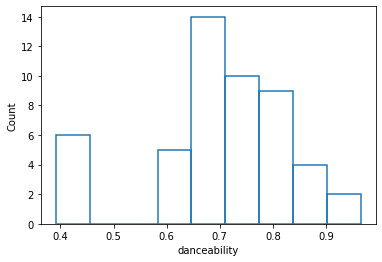

In [ ]:
sns.histplot(dict_merged_dfs_tophits['US']['danceability'], fill = False)

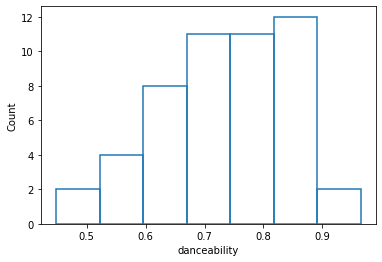

In [ ]:
sns.histplot(dict_merged_dfs_tophits['MX']['danceability'], fill = False)

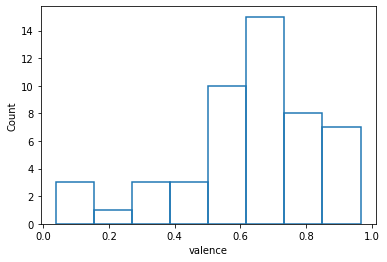

In [ ]:
sns.histplot(dict_merged_dfs_tophits['MX']['valence'], fill = False)

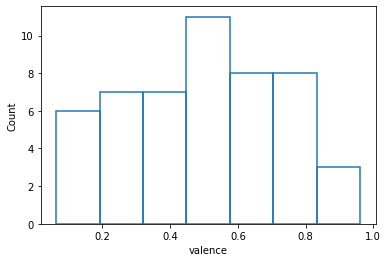

In [ ]:
sns.histplot(dict_merged_dfs_tophits['US']['valence'], fill = False)

Curiosamente no solo somos diferentes, si no que en ciertas métricas nos comportamos como opuestos.

Algo que salta es que al momento de tomar los promedios, esa diferencia podría no ser tan notoria como para ilustrar correctamente estas distribuciones, por lo tanto, creamos dos variables aleatorias que nos diran si la canción es *alegre* o *bailable*. (Elegimos .5 como el límite que una canción tendra que pasar para ser alguna de estas categorías porque es la mitad, y a ojo de buen cubero por los histogramas anteriores.

In [ ]:
for country in dict_merged_dfs_tophits:
  dict_merged_dfs_tophits[country]['happysong'] = dict_merged_dfs_tophits[country]['valence'].apply(lambda x : 1 if x >= .5 else 0)
  dict_merged_dfs_tophits[country]['danceysong'] = dict_merged_dfs_tophits[country]['danceability'].apply(lambda x : 1 if x >= .5 else 0)


Ahora, como nuestro propósito final es ver las diferencias a nivel país, necesitamos un agregado de las métricas, pues queremos una historia normalizada entre todos. Aquí es donde las variables auxiliares que creamos en el paso anterior nos servirán para representar correctamente el número de canciones _alegres_ o _bailables_ .

In [ ]:
list_aggregated_df = []
for country in dict_merged_dfs_tophits:
  aggregated_df_country = pd.DataFrame(index = [0])
  aggregated_df_country['country'] = country
  aggregated_df_country['avg_valence']= dict_merged_dfs_tophits[country]['valence'].mean()
  aggregated_df_country['avg_danceability']= dict_merged_dfs_tophits[country]['danceability'].mean()
  aggregated_df_country['avg_energy']= dict_merged_dfs_tophits[country]['energy'].mean()
  aggregated_df_country['avg_loudness']= dict_merged_dfs_tophits[country]['loudness'].mean()
  aggregated_df_country['avg_speechiness']= dict_merged_dfs_tophits[country]['speechiness'].mean()
  aggregated_df_country['avg_duration_ms']= dict_merged_dfs_tophits[country]['duration_ms'].mean()
  aggregated_df_country['avg_instrumentalness']= dict_merged_dfs_tophits[country]['instrumentalness'].mean()
  aggregated_df_country['avg_acousticness']= dict_merged_dfs_tophits[country]['acousticness'].mean()
  aggregated_df_country['avg_speechiness']= dict_merged_dfs_tophits[country]['speechiness'].mean()
  aggregated_df_country['num_happysongs']= dict_merged_dfs_tophits[country]['happysong'].sum()
  aggregated_df_country['num_danceysongs']= dict_merged_dfs_tophits[country]['danceysong'].sum()

  list_aggregated_df.append(aggregated_df_country)


¡Finalmente concatenamos todas las DataFrames anteriores en un DataFrame de todo el mundo!

In [ ]:
agregated_df_all_countries = pd.concat([dataframe for dataframe in list_aggregated_df]).reset_index(drop = True)

Aquí es donde nos apoyaremos con la segunda tabla que _srcappeamos_ al principio para obtener el ISO alpha-3. Pudimos haber hecho esto desde un principio, pero a quien no le gustan los _merge_.

In [ ]:
aggregated_w_iso3 = agregated_df_all_countries.merge(iso_full, left_on='country', right_on= 'Alpha-2 code', how = 'inner')

In [ ]:
aggregated_w_iso3

,country,avg_valence,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_duration_ms,avg_instrumentalness,avg_acousticness,num_happysongs,num_danceysongs,Country,Alpha-2 code,Alpha-3 code,Numeric
0,AD,0.520182,0.694760,0.624740,-6.481240,0.103346,185217.260000,0.002449,0.257020,27,46,Andorra,AD,AND,020
1,AE,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,United Arab Emirates (the),AE,ARE,784
2,AG,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,Antigua and Barbuda,AG,ATG,028
3,AL,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,Albania,AL,ALB,008
4,AM,0.487116,0.688659,0.606295,-6.896614,0.089698,184046.204545,0.012773,0.277162,22,38,Armenia,AM,ARM,051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,VN,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,Viet Nam,VN,VNM,704
160,VU,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,Vanuatu,VU,VUT,548
161,WS,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,Samoa,WS,WSM,882
162,ZA,0.507822,0.700020,0.608920,-6.852500,0.096646,182393.720000,0.011777,0.259983,27,44,South Africa,ZA,ZAF,710


Finalmente llega la estrella de la función (perdón Spotipy). 

## Geopandas, finalmente.

Importemos geopandas y veamos que podremos obtener fácilmente un _mapamundi_ en los _datasets_ que contiene.

In [ ]:
import geopandas as gpd

In [ ]:
gpd.datasets

<module 'geopandas.datasets' from '/usr/local/lib/python3.7/dist-packages/geopandas/datasets/__init__.py'>

In [ ]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Curiosamente este dataset tiene los códigos ISO alpha-3. Coincidencia, tal vez.

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Aprovechemos este hecho inédito para pegar al _geodataframe_ el _DataFrame_ que habíamos hecho.

In [ ]:
world_w_spotify = world.merge(aggregated_w_iso3, left_on = 'iso_a3', right_on = 'Alpha-3 code', how = 'left')

In [ ]:
world_w_spotify

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,avg_valence,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_duration_ms,avg_instrumentalness,avg_acousticness,num_happysongs,num_danceysongs,Country,Alpha-2 code,Alpha-3 code,Numeric
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,0.507822,0.70002,0.60892,-6.8525,0.096646,182393.72,0.011777,0.259983,27.0,44.0,Fiji,FJ,FJI,242
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZ,0.507822,0.70002,0.60892,-6.8525,0.096646,182393.72,0.011777,0.259983,27.0,44.0,"Tanzania, United Republic of",TZ,TZA,834
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,0.466622,0.71770,0.61340,-6.2905,0.083168,177164.88,0.011649,0.159453,23.0,49.0,Canada,CA,CAN,124
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,0.507822,0.70002,0.60892,-6.8525,0.096646,182393.72,0.011777,0.259983,27.0,44.0,United States of America (the),US,USA,840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",RS,0.507822,0.70002,0.60892,-6.8525,0.096646,182393.72,0.011777,0.259983,27.0,44.0,Serbia,RS,SRB,688
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TT,0.507822,0.70002,0.60892,-6.8525,0.096646,182393.72,0.011777,0.259983,27.0,44.0,Trinidad and Tobago,TT,TTO,780


Ahora veamos finalmente que países son más felíces (o al menos intentan hacer de su vida feliz, una canción a la vez)

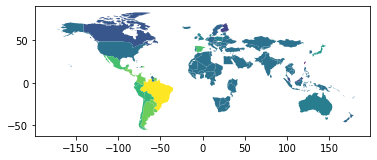

In [ ]:
world_w_spotify.plot('avg_valence')

Pero este mapa no nos convence. Instalemos otra librería que ayudara a _geopandas_ a hacer gráficos mas estéticos y veamos una probada de lo que podemos llegar a descubrir con el dataset que construimos (*casi*) desde cero.

In [ ]:
!pip install mapclassify

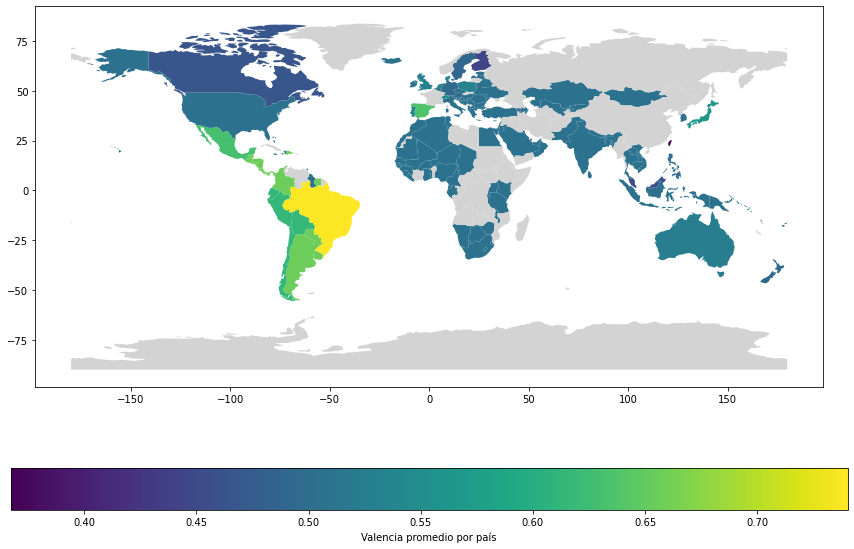

In [ ]:
world_w_spotify.plot(
        column="avg_valence",
        legend=True,
        figsize=(15, 10),
        legend_kwds={'label': "Valencia promedio por país en el top 50",
                          'orientation': "horizontal"},
        missing_kwds={
            "color": "lightgrey",
        },
    );

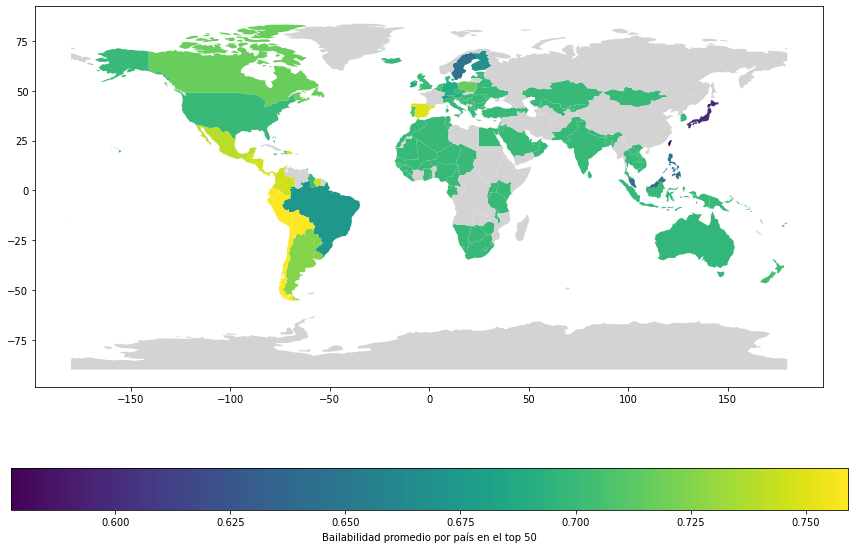

In [ ]:
world_w_spotify.plot(
        column="avg_danceability",
        legend=True,
        figsize=(15, 10),
        legend_kwds={'label': "Bailabilidad promedio por país en el top 50",
                          'orientation': "horizontal"},
        missing_kwds={
            "color": "lightgrey",
        },
    );

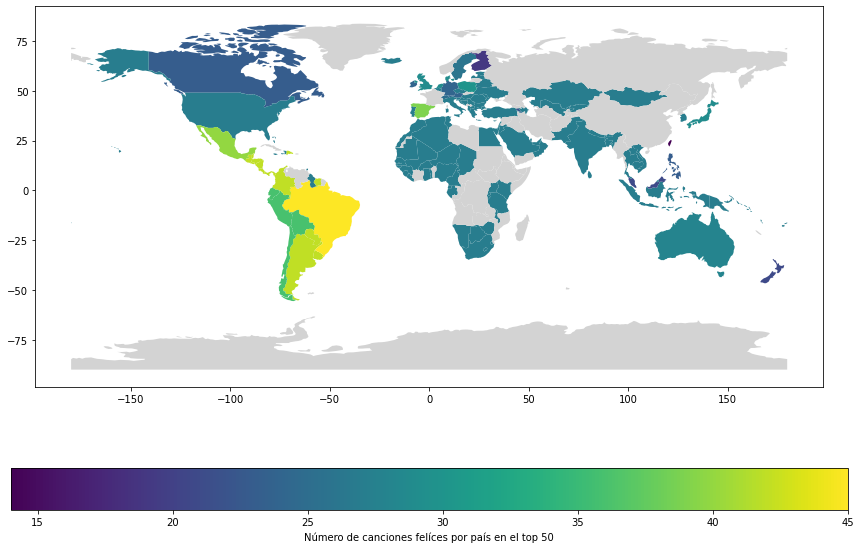

In [ ]:
world_w_spotify.plot(
        column="num_happysongs",
        legend=True,
        figsize=(15, 10),
        legend_kwds={'label': "Número de canciones felíces por país en el top 50",
                          'orientation': "horizontal"},
        missing_kwds={
            "color": "lightgrey",
        },
    );

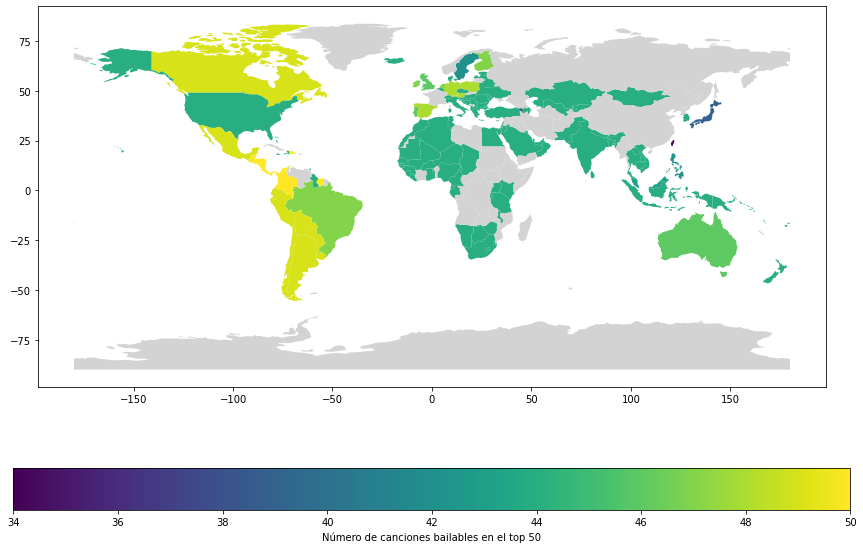

In [ ]:
world_w_spotify.plot(
        column="num_danceysongs",
        legend=True,
        figsize=(15, 10),
        legend_kwds={'label': "Número de canciones bailables en el top 50",
                          'orientation': "horizontal"},
        missing_kwds={
            "color": "lightgrey",
        },
    );

Podemos deducir, *felízmente*, que nuestras aseveraciones iniciales respecto a la pérdida de la individualidad han sido desmentidas (con toda la rigurosidad estadística que representa una gráfica de diferentes colores). Y más que eso, parece que a la sangre latina la fiesta le viene naturalmente. 

Con más tiempo podemos llegar a más conclusiones, sin embargo, el lector es libre de hacer cualquiera otra con la información que aquí creamos (que no es mía ni nada por el estilo, pero si pasamos buen rato batallando con los JSON's). Hasta la próxima.